In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('cleveland.csv', names=columns)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Removing missing values:

In [4]:
for col in data.columns:
    if '?' in data[col].values.tolist():
        print(col)

ca
thal


In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
data.shape

(303, 14)

In [8]:
data = data[data['ca'] != '?']
data = data[data['thal'] != '?']

In [9]:
data.shape

(297, 14)

## Chosen attributes for various data types:

- **Categorical/nominal: sex** (gender)
- **Ordinal: slope** (the slope of the peak exercise ST segment)
- **Discrete quantitative : age** (age in years) 
- **Continuous quantiative: trestbps** (resting blood pressure) 

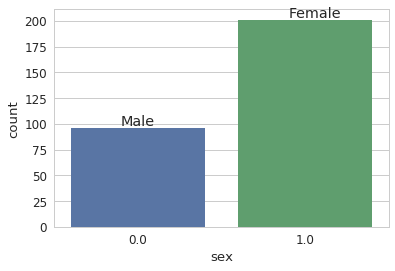

In [47]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig = sns.countplot(x="sex", data=data)
labels = ['Male', 'Female']
for i, p in enumerate(fig.patches):
        fig.annotate('{}'.format(labels[i]), (p.get_x()+0.3, p.get_height()+2))

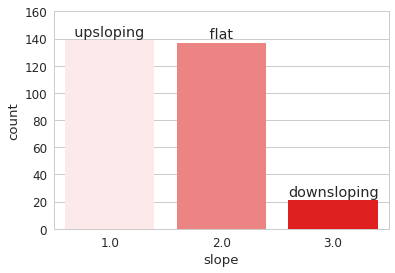

In [48]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
with sns.color_palette(sns.light_palette("red", 3)):
    fig = sns.countplot(x='slope', data=data)
    labels = ['  upsloping  ', '       flat','downsloping']
    for i, p in enumerate(fig.patches):
        fig.annotate('{}'.format(labels[i]), (p.get_x(), p.get_height()+3))
        fig.axes.set_ylim(0, 160)

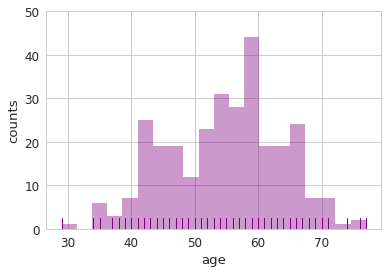

In [46]:
sns.set_style(None)
fig = sns.distplot(data['age'], kde=False, rug=True, bins=20, color='purple')
_ = fig.axes.set_ylim(0, 50)
_ = fig.set_ylabel('counts')

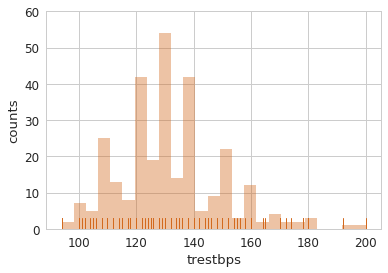

In [54]:
fig = sns.distplot(data['trestbps'], kde=False, rug=True, bins=25, color='chocolate')
_ = fig.axes.set_ylim(0, 60)
_ = fig.set_ylabel('counts')